In [1]:
import numpy as np
import pandas as pd
import struct
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
import sys
import os
import seaborn
from  matplotlib import pyplot

In [2]:
df = pd.DataFrame(
    {
        # "B": [1, 1, 1, 1, 1, 1, 1, 1],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

print(df)
n = df.shape[0]
print(n)

df = df.agg([np.mean, np.std])
df.loc['std'] = df.loc['std'] / math.sqrt(n)
print(df)

df['E'] = [df['C'].loc['mean'] + df['D'].loc['mean'], math.sqrt(df['C'].loc['std'] * df['C'].loc['std'] + df['D'].loc['std'] * df['D'].loc['std'])]
print(df)

print('after pivoting')
# df = df.reset_index(names='observables')
# df = df.pivot(columns='observables')
df = df.stack()
print(df)

          C         D
0 -1.501752  0.251204
1  1.033782 -0.326041
2 -0.003421  0.206648
3 -0.938365  3.073885
4 -1.479397 -0.705083
5 -0.515220  0.093947
6  1.032045 -2.391691
7 -0.802542 -0.638906
8
             C         D
mean -0.396859 -0.054505
std   0.356265  0.539038
             C         D         E
mean -0.396859 -0.054505 -0.451363
std   0.356265  0.539038  0.646132
after pivoting
mean  C   -0.396859
      D   -0.054505
      E   -0.451363
std   C    0.356265
      D    0.539038
      E    0.646132
dtype: float64


In [3]:
def save_image(image_path, image_name, fg):
    try:
        os.makedirs(image_path)
    except:
        pass
    
    output_path = f'{image_path}/{image_name}'
    fg.savefig(output_path, dpi=400, facecolor='white')

In [4]:
def make_plot(df, observable, x_label, y_label, image_path, image_name, is_horizontal_line):
    print(f'{observable}')

    fontsize=13

    fg = seaborn.FacetGrid(data=df, height=4, aspect=1.6, legend_out=False)
    fg.map(plt.errorbar, 'beta', f'<{observable}>', f'err_{observable}', fmt='o', ms = 3, capsize = 5, lw = 0.5, linestyle = '').add_legend()

    fg.ax.spines['right'].set_visible(True)
    fg.ax.spines['top'].set_visible(True)
    fg.ax.minorticks_on()
    if is_horizontal_line:
        fg.ax.axhline(xmin=0.03, xmax=0.98, c = 'black', lw = 0.5)
    # plt.grid(dash_capstyle = 'round')
    fg.ax.tick_params(which = 'both', bottom = True, top = True, left = True, right = True)
    fg.ax.set_xlabel(x_label, fontsize=fontsize)
    fg.ax.set_ylabel(y_label, fontsize=fontsize)
    plt.show()

    save_image(image_path, image_name, fg)

def get_xlabel1(c, V, obs, mode):
    if c != '':
        c0 = r'${c}^{0}$'
    else:
        c0 = ''
    if V != '':
        V0 = r'${V}^{0}$'
    else:
        V0 = ''

    if mode == 'common':
        xlabel = c + V + obs + '>-'
        xlabel = xlabel + c0 + V0 + obs + r'$>^{0}$'
    elif mode == 'zero_temperature':
        xlabel = c0 + V0 + obs + r'$>^{0}$'
    elif mode == 'non-zero_temperature':
        xlabel = c + V + obs + '>'
    else:
        print('wrong mode')
    return xlabel

def get_xlabel2(s_T, s_0, mode):
    if mode == 'common':
        xlabel = s_T + '-' + s_0
    elif mode == 'non-zero_temperature':
        xlabel = s_T
    elif mode == 'zero_temperature':
        xlabel = s_0
    else:
        print('wrong mode')
    return xlabel

def plot_coefficients(path, image_path, mode, horiz_line):
    df = pd.read_csv(path, sep=',')
    # df = df[df['bin'] == 925]
    # print(df)

    s1_T = r'$s_{1}$'
    s1_0 = r'$s_{1}^{0}$'
    a1_T = r'$c_{2}a_{1}$'
    a1_0 = r'$c_{2}^{0}a_{1}^{0}$'
    a2_T = r'$c_{2}Va_{2}$'
    a2_0 = r'$c_{2}^{0}V_{0}a_{2}^{0}$'
    b3_T = r'$c_{4}Vb_{3}$'
    b3_0 = r'$c_{4}^{0}V_{0}b_{3}^{0}$'
    b2_T = r'$c_{4}V^{2}b_{2}$'
    b2_0 = r'$c_{4}^{0}V^{2}_{0}b_{2}^{0}$'
    b1_T = r'$c_{4}V^{3}b_{1}$'
    b1_0 = r'$c_{4}^{0}V^{3}_{0}b_{1}^{0}$'
    k2_T = r'$k_{2}$'
    k2_0 = r'$k_{2}^{0}$'
    k4_T = r'$k_{4}$'
    k4_0 = r'$k_{4}^{0}$'

    image_name = ''
    if mode == 'common':
        image_name = 'common'

    make_plot(df, 's1', r'$\beta$', get_xlabel2(s1_T, s1_0, mode), image_path, 's1' + image_name, horiz_line)
    make_plot(df, 'a1', r'$\beta$', get_xlabel2(a1_T, a1_0, mode), image_path, 'a1' + image_name, horiz_line)
    make_plot(df, 'a2', r'$\beta$', get_xlabel2(a2_T, a2_0, mode), image_path, 'a2' + image_name, horiz_line)
    make_plot(df, 'b3', r'$\beta$', get_xlabel2(b3_T, b3_0, mode), image_path, 'b3' + image_name, horiz_line)
    make_plot(df, 'b2', r'$\beta$', get_xlabel2(b2_T, b2_0, mode), image_path, 'b2' + image_name, horiz_line)
    make_plot(df, 'b1', r'$\beta$', get_xlabel2(b1_T, b1_0, mode), image_path, 'b1' + image_name, horiz_line)
    make_plot(df, 'k2', r'$\beta$', get_xlabel2(k2_T, k2_0, mode), image_path, 'k2' + image_name, horiz_line)
    make_plot(df, 'k4', r'$\beta$', get_xlabel2(k4_T, k4_0, mode), image_path, 'k4' + image_name, horiz_line)


In [5]:
def make_plots_coef(Nt, lattice, modes, version):
    for mode in modes:
        path = f'../../result/SU3_gluodynamics/{version}/{lattice}/columns_new/coefficients_'
        if mode == 'common':
            path = path + mode + '_'
            horiz_line = True
        else:
            horiz_line = False
        path = path + f'Nt{Nt}.csv'
        image_path = f'../../images/SU3_gluodynamics/{version}/{lattice}/coefficients/Nt{Nt}'
        plot_coefficients(path, image_path, mode, horiz_line)

s1


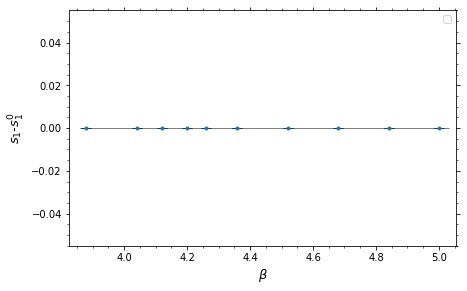

a1


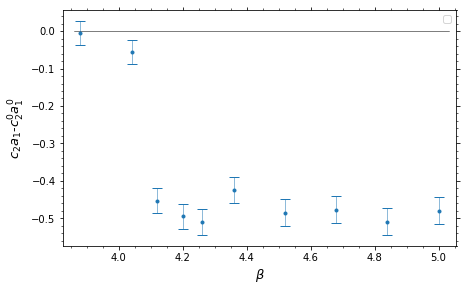

a2


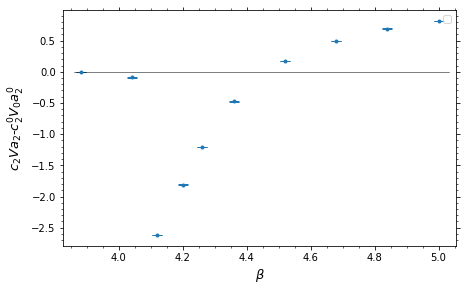

b3


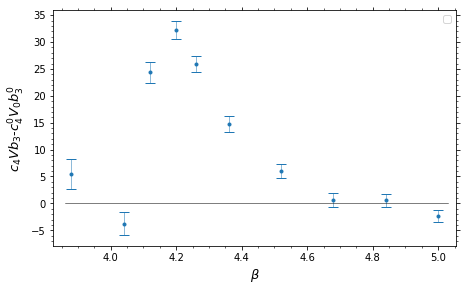

b2


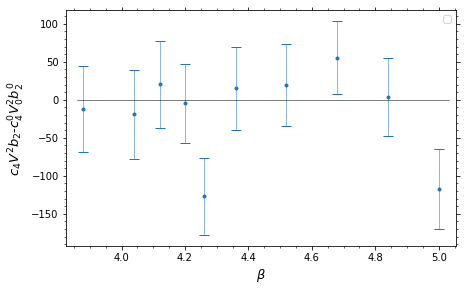

b1


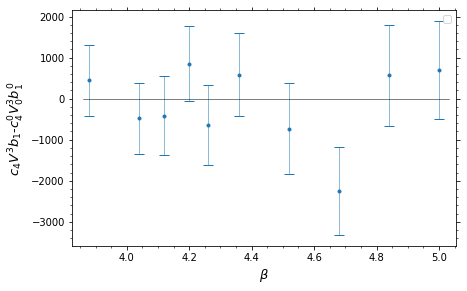

k2


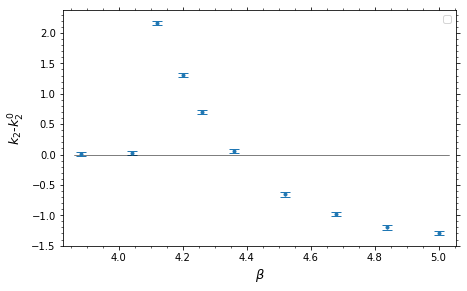

k4


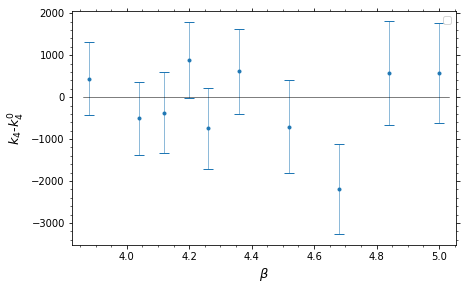

s1


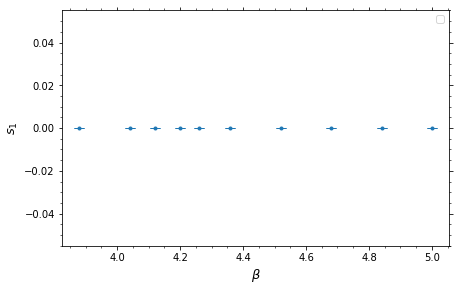

a1


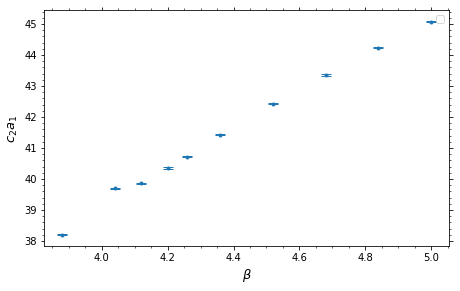

a2


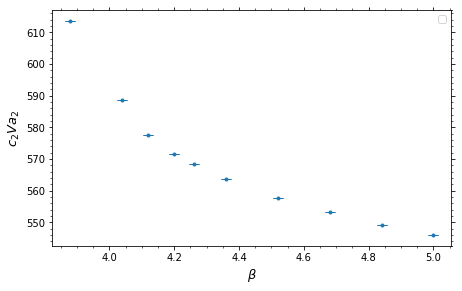

b3


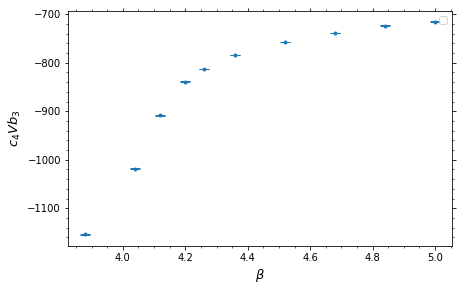

b2


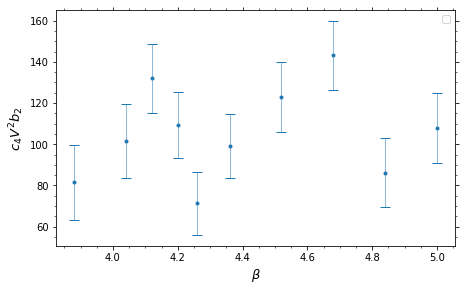

b1


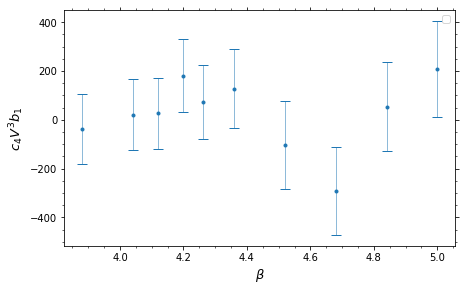

k2


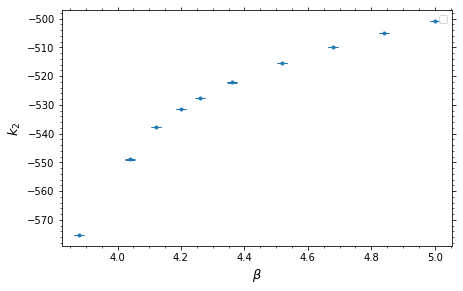

k4


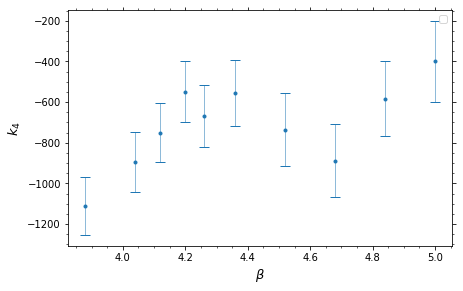

s1


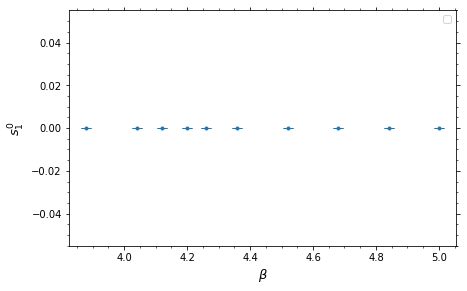

a1


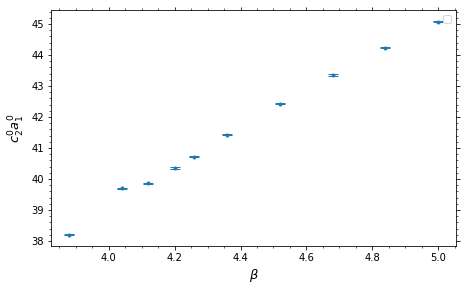

a2


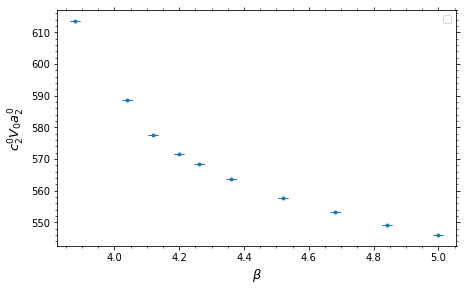

b3


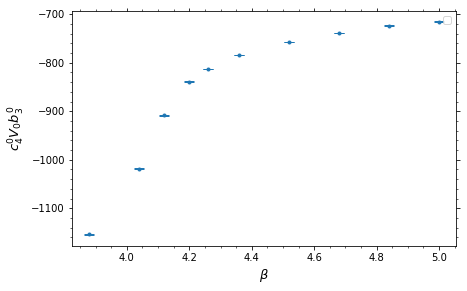

b2


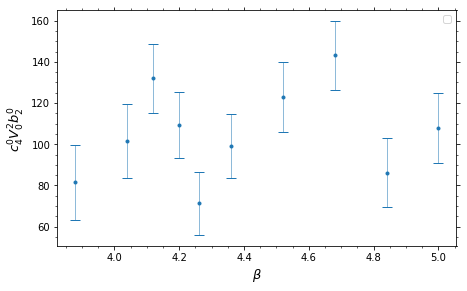

b1


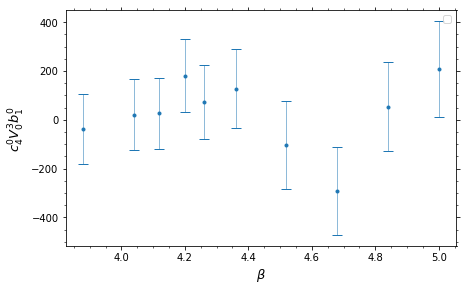

k2


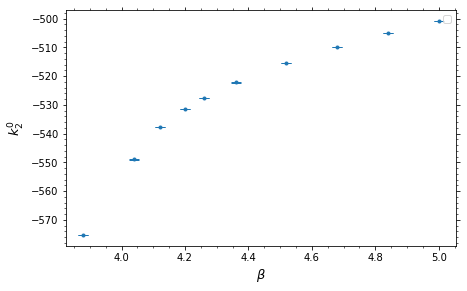

k4


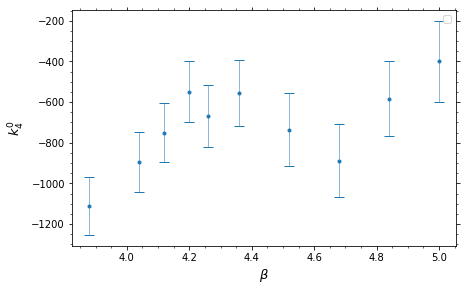

In [7]:
modes = ['common', 'non-zero_temperature', 'zero_temperature']
Nt_T = 4
Nt_0 = 16
Ns = 21
Nz = 16
lattice = f'{Nt_T}x{Nz}x{Ns}^2'

make_plots_coef(Nt_T, lattice, modes, 'new')

s1


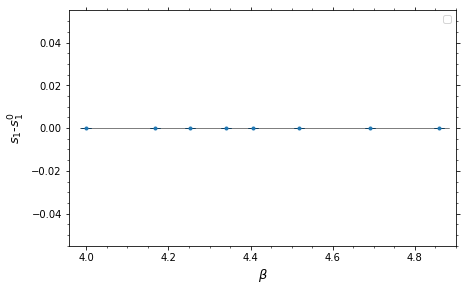

a1


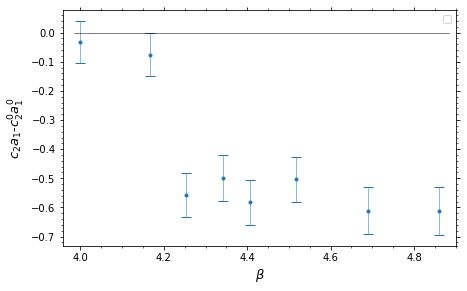

a2


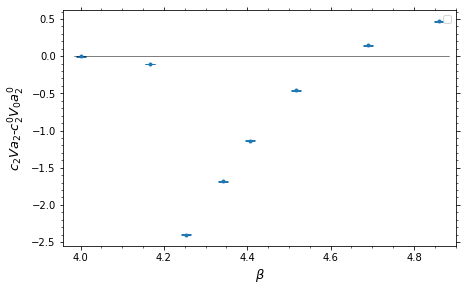

b3


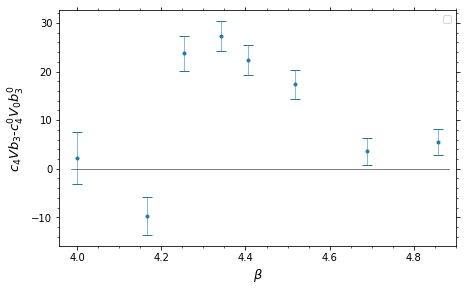

b2


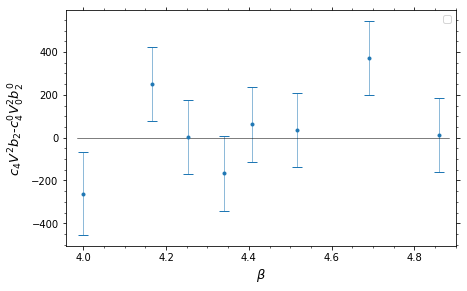

b1


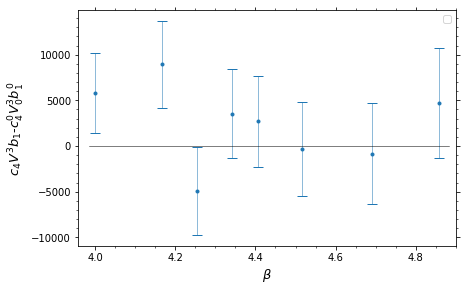

k2


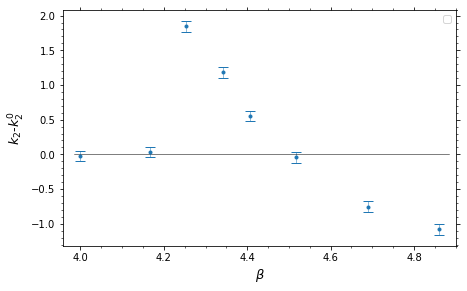

k4


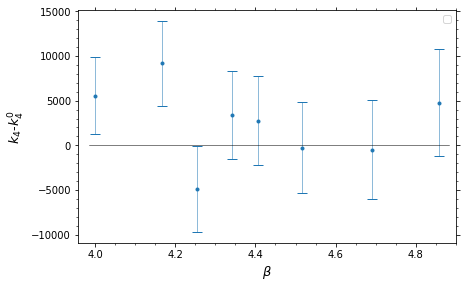

s1


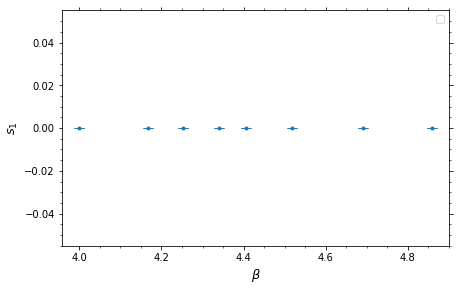

a1


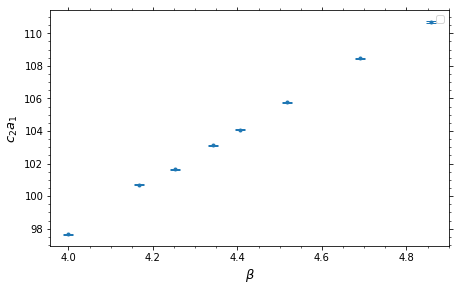

a2


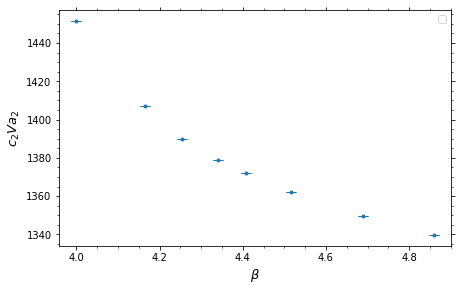

b3


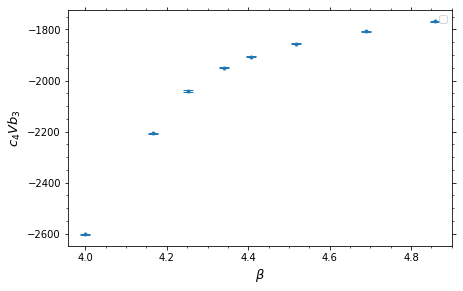

b2


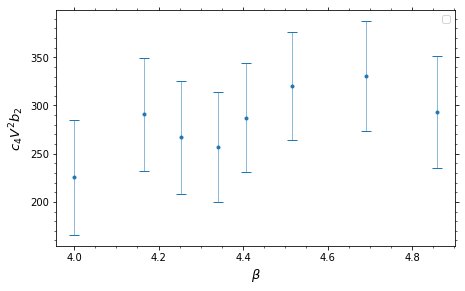

b1


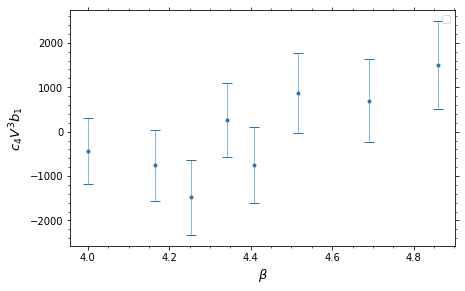

k2


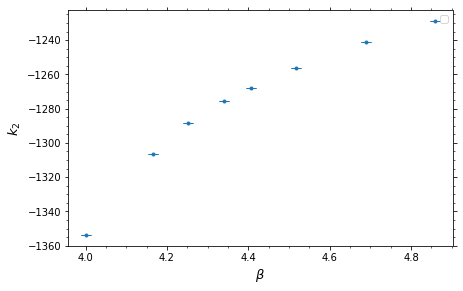

k4


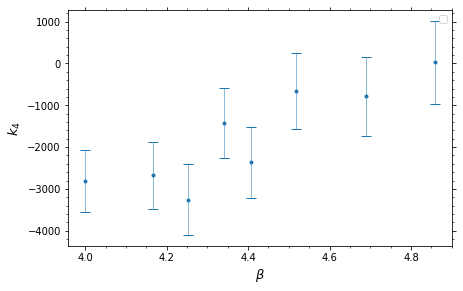

s1


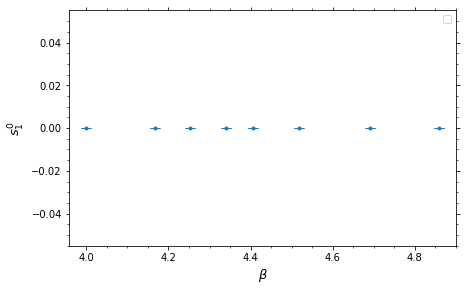

a1


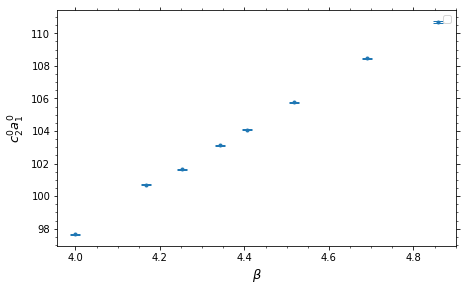

a2


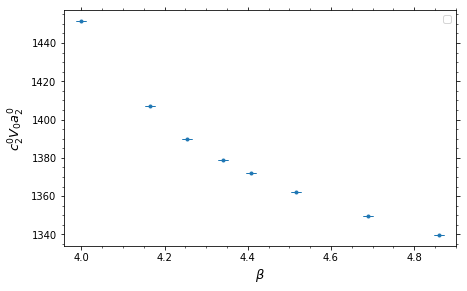

b3


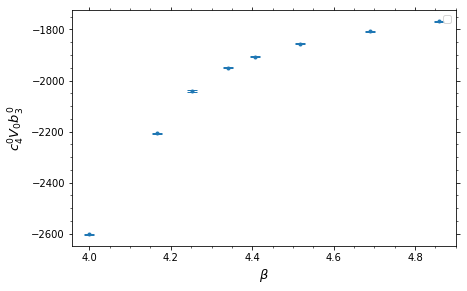

b2


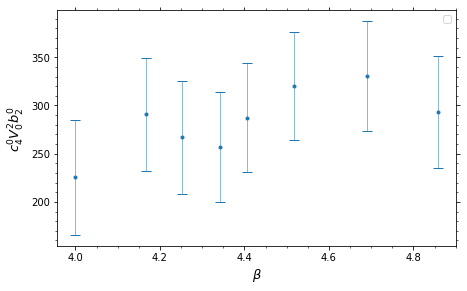

b1


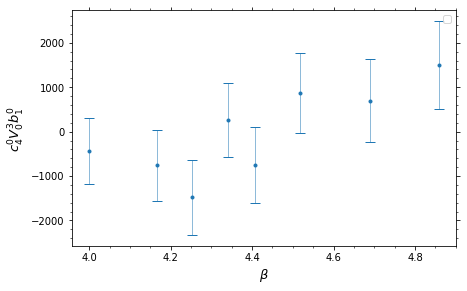

k2


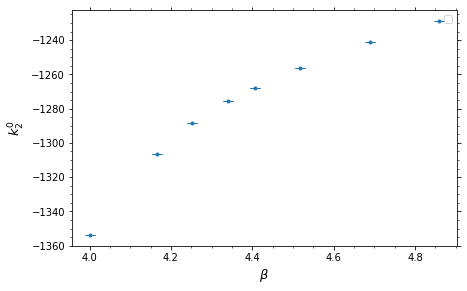

k4


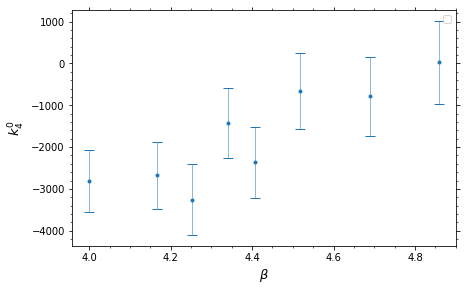

In [8]:
modes = ['common', 'non-zero_temperature', 'zero_temperature']
Nt_T = 5
Nt_0 = 20
Ns = 25
Nz = 20
lattice = f'{Nt_T}x{Nz}x{Ns}^2'

make_plots_coef(Nt_T, lattice, modes, 'new')

s1


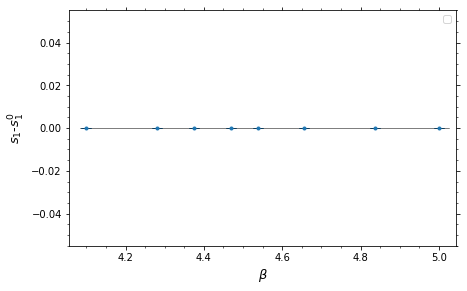

a1


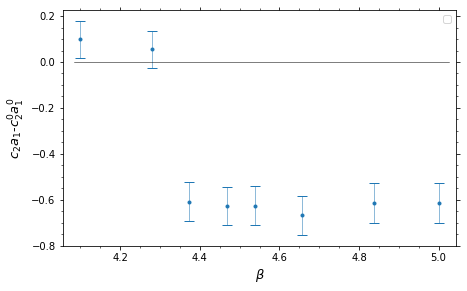

a2


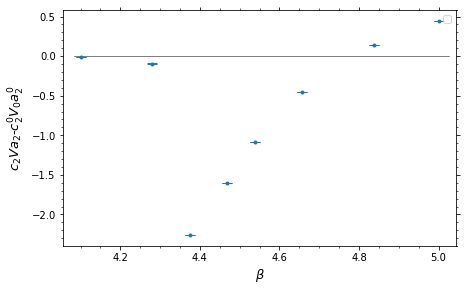

b3


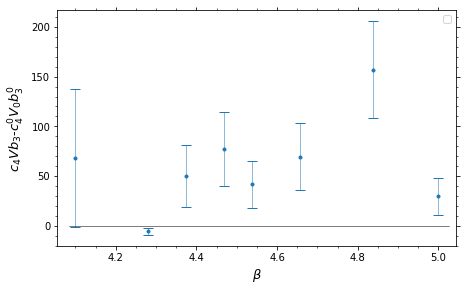

b2


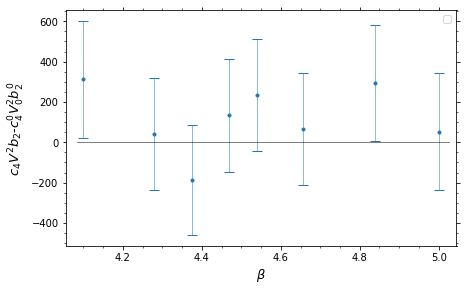

b1


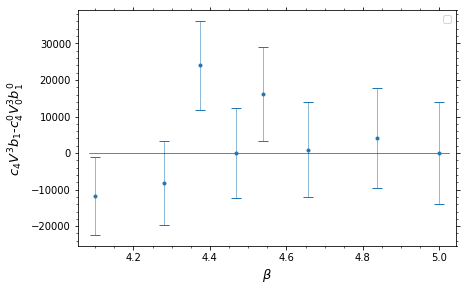

k2


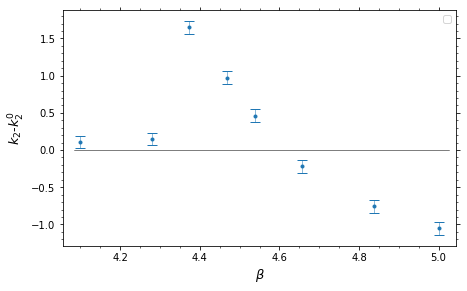

k4


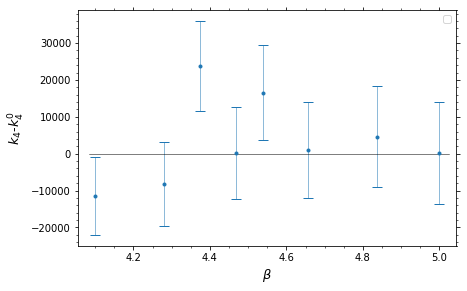

s1


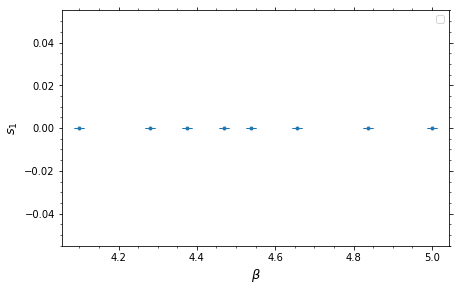

a1


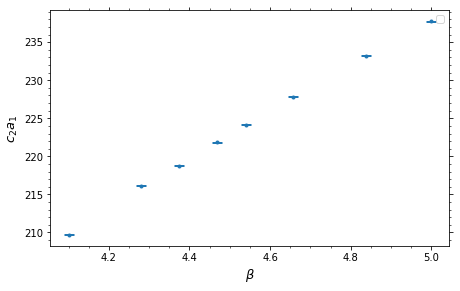

a2


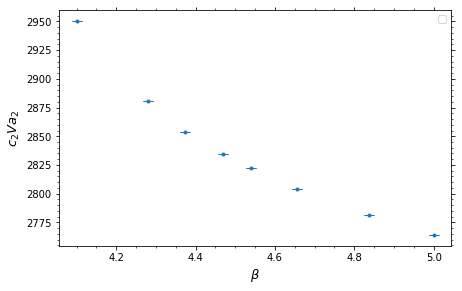

b3


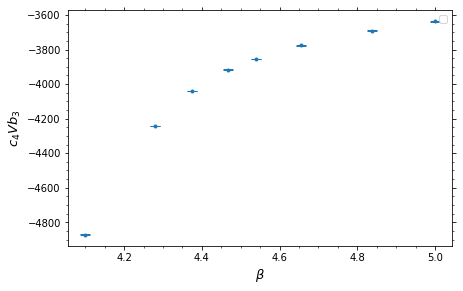

b2


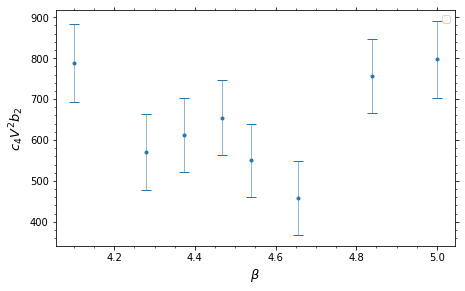

b1


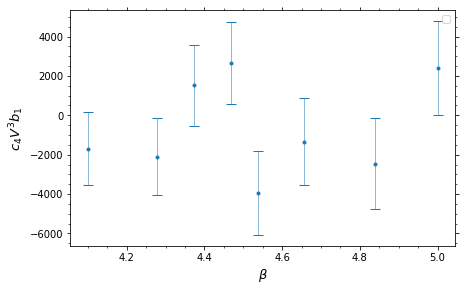

k2


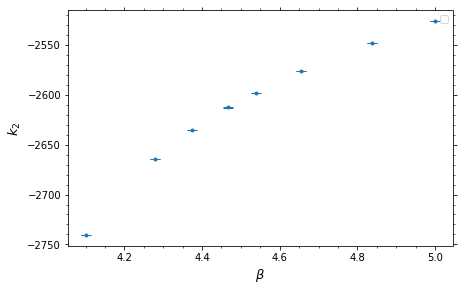

k4


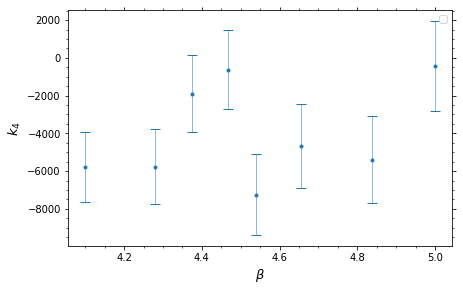

s1


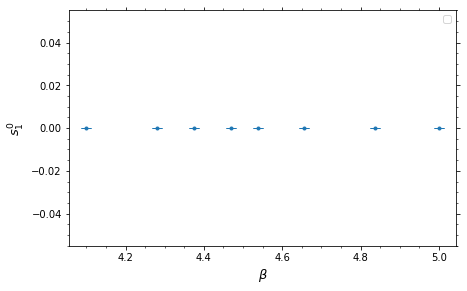

a1


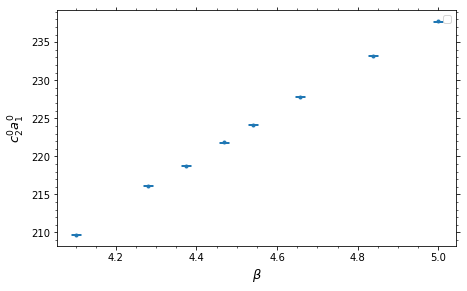

a2


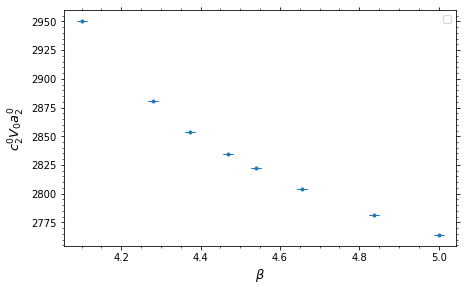

b3


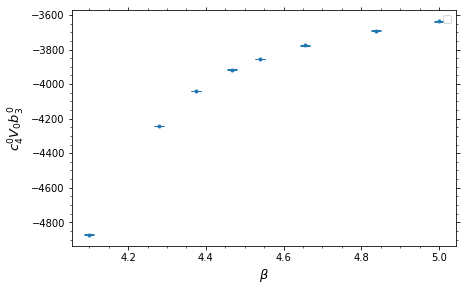

b2


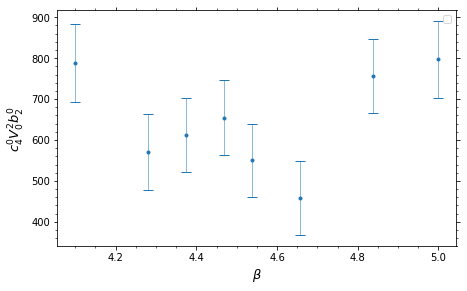

b1


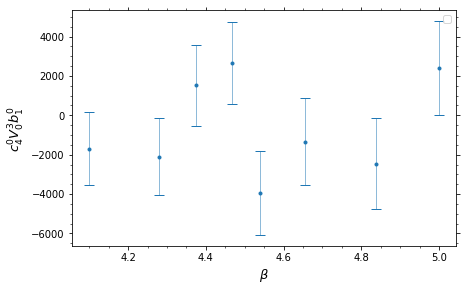

k2


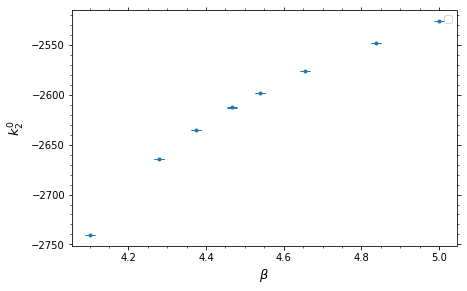

k4


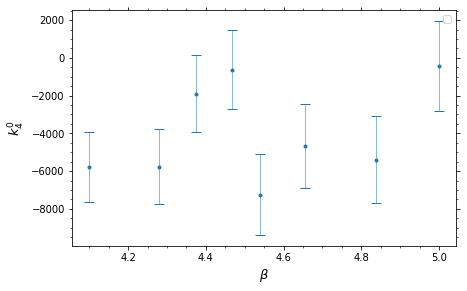

In [11]:
modes = ['common', 'non-zero_temperature', 'zero_temperature']
Nt_T = 6
Nt_0 = 24
Ns = 31
Nz = 24
lattice = f'{Nt_T}x{Nz}x{Ns}^2'

make_plots_coef(Nt_T, lattice, modes, 'new')

In [6]:
def plot_naive(path, observables):
    df = pd.read_csv(path, sep=',')

    print(df)

    for obs in observables:
        print(obs)
        fg = seaborn.FacetGrid(data=df,  aspect=1.61)
        fg.map(plt.errorbar, 'beta', obs[0], obs[1], mfc=None, fmt='o', ms = 3, capsize = 5, lw = 0.5, linestyle = '').add_legend()
        plt.show()

In [58]:
path = path = '../../result/SU3_gluodynamics/Nt6/coefficients_naive.csv'
observables = [('s1_mean', 's1_std'), ('s2_mean', 's2_std'), ('s1^2_mean', 's1^2_std'), ('s2^2_mean', 's2^2_std'), 
                ('s2*s1^2_mean', 's2*s1^2_std'), ('s1^4_mean', 's1^4_std'), ('a1_mean', 'a1_std'), ('a2_mean', 'a2_std'), ('b3_mean', 'b3_std'),
                ('b2_mean', 'b2_std'), ('b1_mean', 'b1_std'), ('k2_mean', 'k2_std'), ('k4_mean', 'k4_std')]
plot_naive(path, observables)

FileNotFoundError: [Errno 2] No such file or directory: '../../result/SU3_gluodynamics/Nt6/coefficients_naive.csv'

In [8]:
def plot_coefficients_bin(path, observable, max_bin, image_path, image_name):
    df = pd.read_csv(path, sep=',')

    # df = df[df['beta'] == 4.32]
    # df = df[df['beta'] == 4.2]
    df = df[df['bin'] <= max_bin]

    fg = seaborn.FacetGrid(data=df, hue = 'beta', aspect=1.61)
    fg.map(plt.errorbar, 'bin', f'err_{observable}', mfc=None, fmt='o', ms = 3, capsize = 5, lw = 0.5, linestyle = '').add_legend()
    fg.ax.set_xscale('log')
    # fg.ax.set_yscale('log')
    plt.show()

    save_image(image_path, image_name, fg)

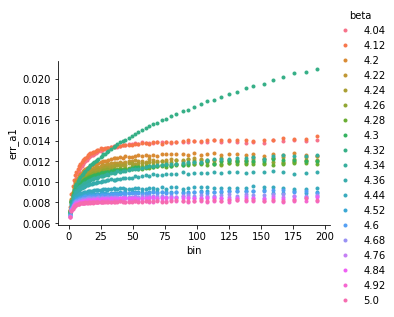

In [95]:
observable = 'a1'
Nt = 6
max_bin = 200
path = f'../../result/SU3_gluodynamics/coefficients_binning_Nt{Nt}.csv'
image_path = '../../images/SU3_gluodynamics/binning'
image_name = f'{observable}_Nt{Nt}_{max_bin}'
plot_coefficients_bin(path, observable, max_bin, image_path, image_name)

In [10]:
observable = '2*k2'
Nt = 5
max_bin = 100
path = f'../../result/SU3_gluodynamics/Nt{Nt}/coefficients_bin.csv'
image_path = '../../images/SU3_gluodynamics/binning'
image_name = f'{observable}_Nt{Nt}_{max_bin}'
plot_coefficients_bin(path, observable, max_bin, image_path, image_name)

FileNotFoundError: [Errno 2] No such file or directory: '../../result/SU3_gluodynamics/Nt5/coefficients_bin.csv'

KeyError: "['err_k2'] not in index"

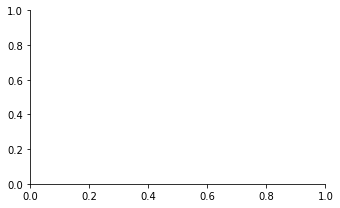

In [9]:
observable = 'k2'
Nt = 4
max_bin = 300
path = f'../../result/SU3_gluodynamics/coefficients_binning_common_Nt{Nt}.csv'
image_path = '../../images/SU3_gluodynamics/binning'
image_name = f'{observable}_Nt{Nt}_{max_bin}'
plot_coefficients_bin(path, observable, max_bin, image_path, image_name)

In [6]:
def make_plot_together(df, observable, x_label, y_label, image_path, image_name, is_horizontal_line):
    print(f'{observable}')

    fontsize=13

    fg = seaborn.FacetGrid(data=df, hue = 'label', height=4, aspect=1.6, legend_out=False)
    fg.map(plt.errorbar, 'beta', f'<{observable}>', f'err_{observable}', fmt='o', ms = 3, capsize = 5, lw = 0.5, linestyle = '').add_legend()

    fg.ax.spines['right'].set_visible(True)
    fg.ax.spines['top'].set_visible(True)
    fg.ax.minorticks_on()
    if is_horizontal_line:
        fg.ax.axhline(xmin=0.03, xmax=0.98, c = 'black', lw = 0.5)
    # plt.grid(dash_capstyle = 'round')
    fg.ax.tick_params(which = 'both', bottom = True, top = True, left = True, right = True)
    fg.ax.set_xlabel(x_label, fontsize=fontsize)
    fg.ax.set_ylabel(y_label, fontsize=fontsize)
    plt.show()

    save_image(image_path, image_name, fg)

def plot_coefficients_together(path1, path2, image_path, mode, horiz_line):
    df1 = pd.read_csv(path1, sep=',')
    df1['label'] = 'no_aver'
    df2 = pd.read_csv(path2, sep=',')
    df2['label'] = 'aver'
    df = pd.concat([df1, df2])
    # df = df[df['bin'] == 925]
    # print(df)

    s1_T = r'$s_{1}$'
    s1_0 = r'$s_{1}^{0}$'
    a1_T = r'$c_{2}a_{1}$'
    a1_0 = r'$c_{2}^{0}a_{1}^{0}$'
    a2_T = r'$c_{2}Va_{2}$'
    a2_0 = r'$c_{2}^{0}V_{0}a_{2}^{0}$'
    b3_T = r'$c_{4}Vb_{3}$'
    b3_0 = r'$c_{4}^{0}V_{0}b_{3}^{0}$'
    b2_T = r'$c_{4}V^{2}b_{2}$'
    b2_0 = r'$c_{4}^{0}V^{2}_{0}b_{2}^{0}$'
    b1_T = r'$c_{4}V^{3}b_{1}$'
    b1_0 = r'$c_{4}^{0}V^{3}_{0}b_{1}^{0}$'
    k2_T = r'$k_{2}$'
    k2_0 = r'$k_{2}^{0}$'
    k4_T = r'$k_{4}$'
    k4_0 = r'$k_{4}^{0}$'

    image_name = ''
    if mode == 'common':
        image_name = 'common'

    make_plot_together(df, 's1', r'$\beta$', get_xlabel2(s1_T, s1_0, mode), image_path, 's1' + image_name, horiz_line)
    make_plot_together(df, 'a1', r'$\beta$', get_xlabel2(a1_T, a1_0, mode), image_path, 'a1' + image_name, horiz_line)
    make_plot_together(df, 'a2', r'$\beta$', get_xlabel2(a2_T, a2_0, mode), image_path, 'a2' + image_name, horiz_line)
    make_plot_together(df, 'b3', r'$\beta$', get_xlabel2(b3_T, b3_0, mode), image_path, 'b3' + image_name, horiz_line)
    make_plot_together(df, 'b2', r'$\beta$', get_xlabel2(b2_T, b2_0, mode), image_path, 'b2' + image_name, horiz_line)
    make_plot_together(df, 'b1', r'$\beta$', get_xlabel2(b1_T, b1_0, mode), image_path, 'b1' + image_name, horiz_line)
    make_plot_together(df, 'k2', r'$\beta$', get_xlabel2(k2_T, k2_0, mode), image_path, 'k2' + image_name, horiz_line)
    make_plot_together(df, 'k4', r'$\beta$', get_xlabel2(k4_T, k4_0, mode), image_path, 'k4' + image_name, horiz_line)

In [14]:
def make_plots_coef_together(Nt, lattice, modes, data_version):
    for mode in modes:
        path1 = f'../../result/SU3_gluodynamics/{data_version}/{lattice}/columns_old/coefficients_'
        path2 = f'../../result/SU3_gluodynamics/{data_version}/{lattice}/columns_new/coefficients_'
        if mode == 'common':
            path1 = path1 + mode + '_'
            path2 = path2 + mode + '_'
            horiz_line = True
        else:
            horiz_line = False
        path1 = path1 + f'Nt{Nt}.csv'
        path2 = path2 + f'Nt{Nt}.csv'
        image_path = f'../../images/SU3_gluodynamics/{data_version}/{lattice}/coefficients_together/Nt{Nt}'
        plot_coefficients_together(path1, path2, image_path, mode, horiz_line)

s1


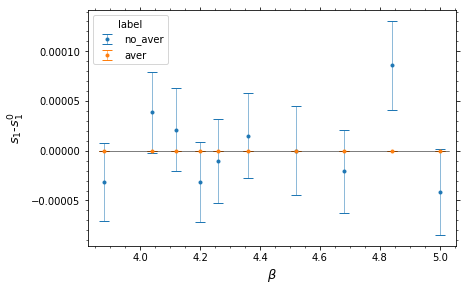

a1


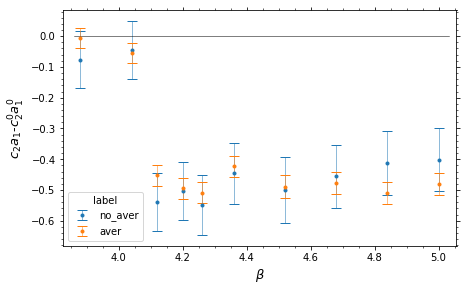

a2


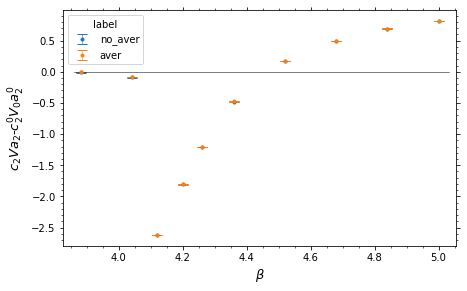

b3


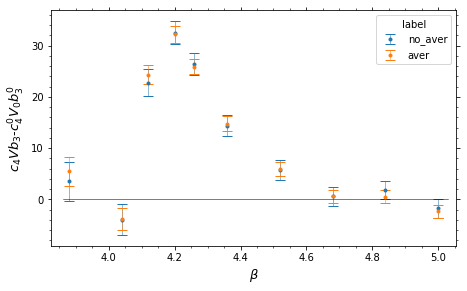

b2


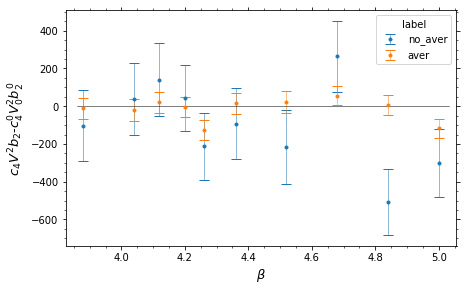

b1


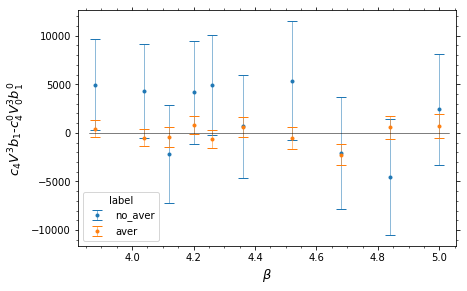

k2


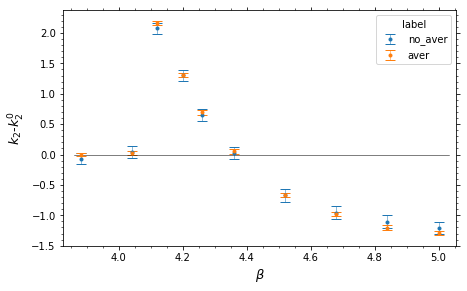

k4


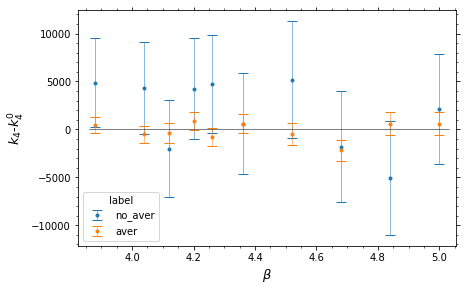

s1


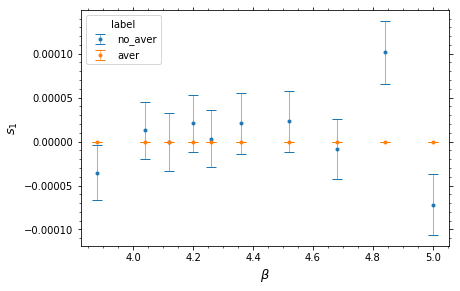

a1


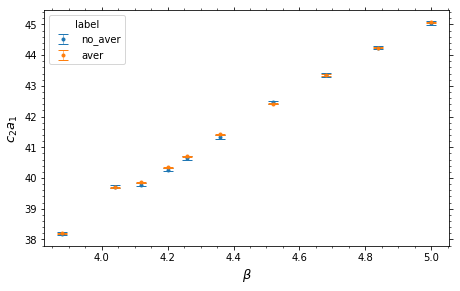

a2


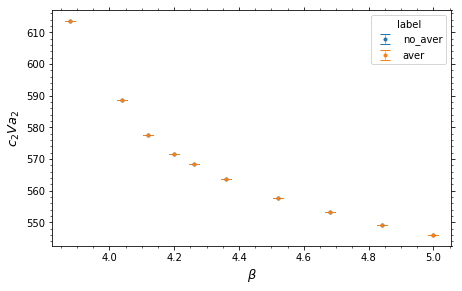

b3


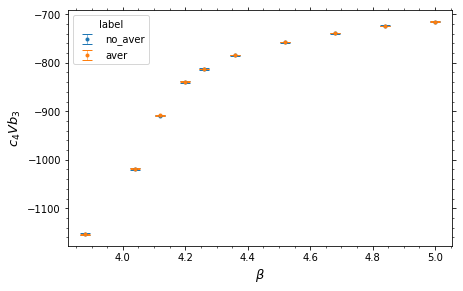

b2


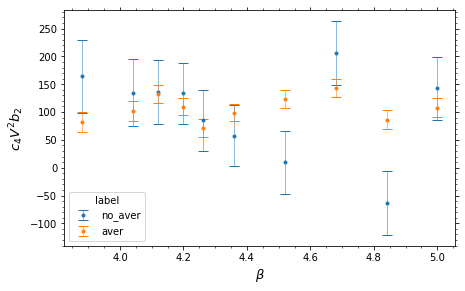

b1


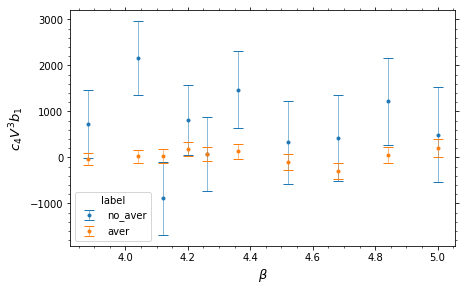

k2


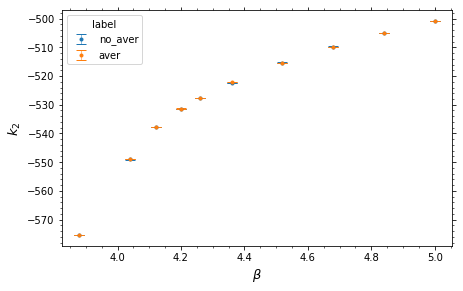

k4


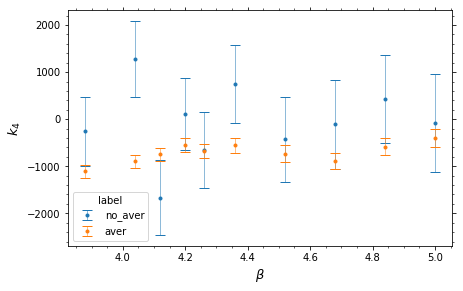

s1


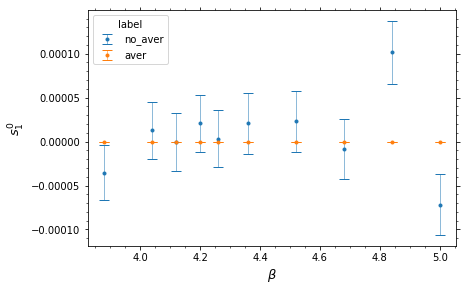

a1


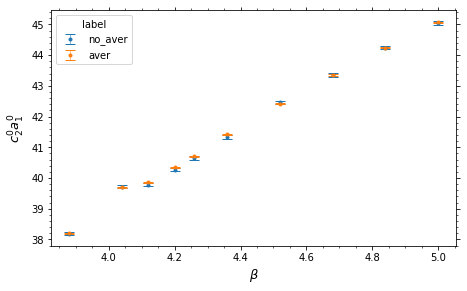

a2


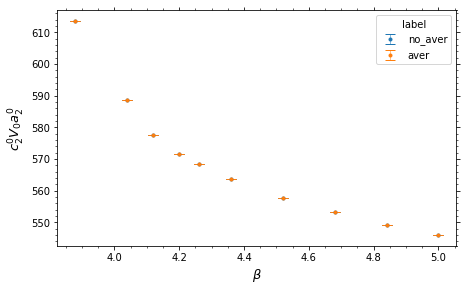

b3


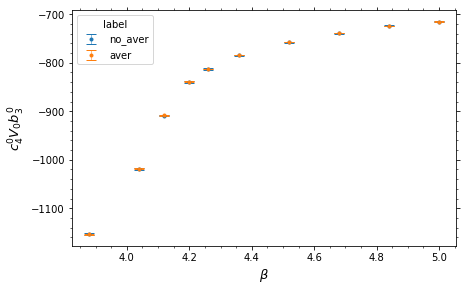

b2


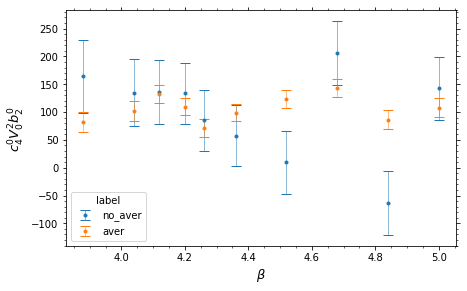

b1


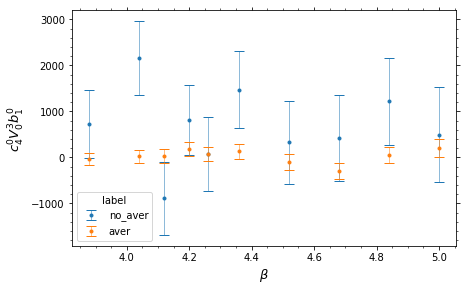

k2


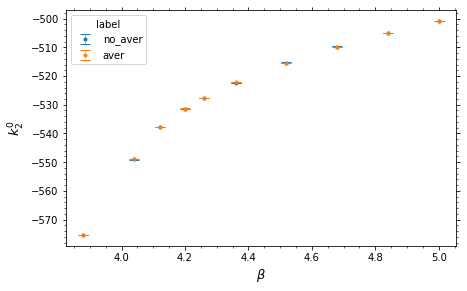

k4


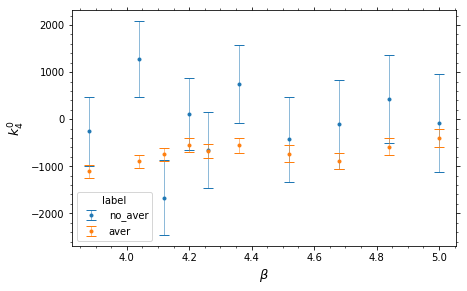

In [24]:
modes = ['common', 'non-zero_temperature', 'zero_temperature']
Nt_T = 4
Nt_0 = 16
Ns = 21
Nz = 16
lattice = f'{Nt_T}x{Nz}x{Ns}^2'

make_plots_coef_together(Nt_T, lattice, modes, 'new')

s1


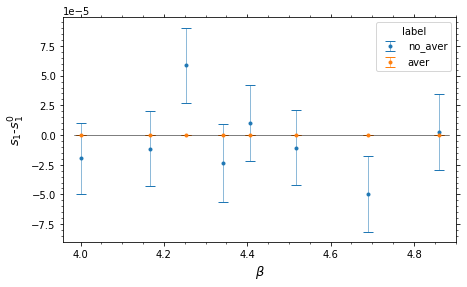

a1


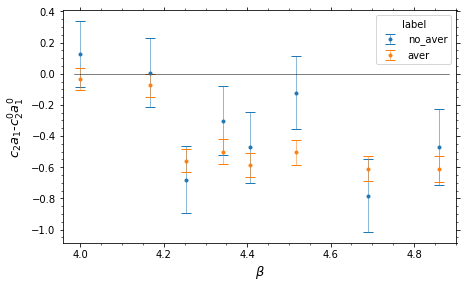

a2


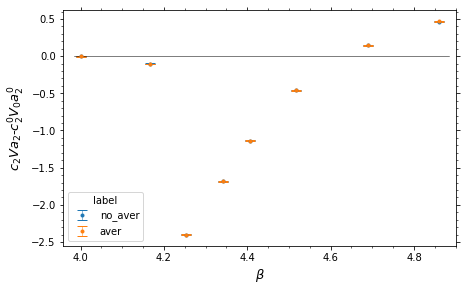

b3


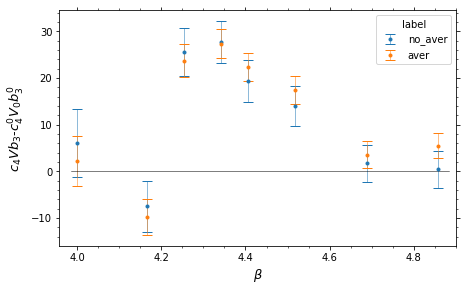

b2


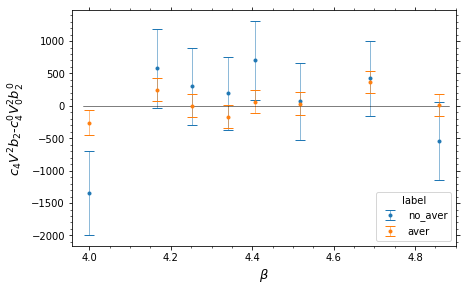

b1


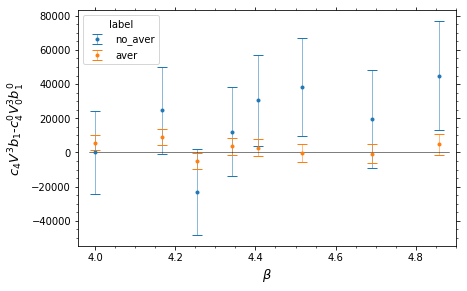

k2


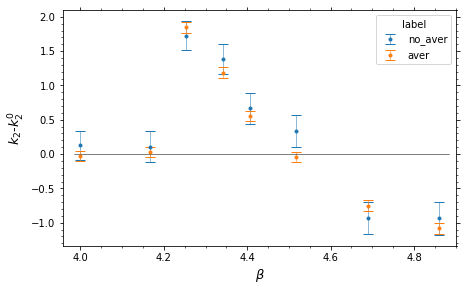

k4


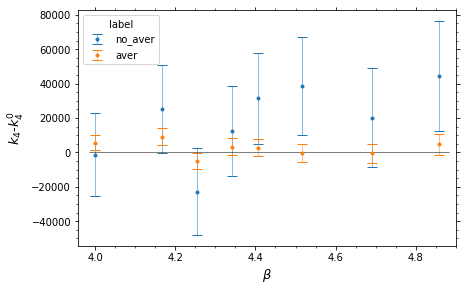

s1


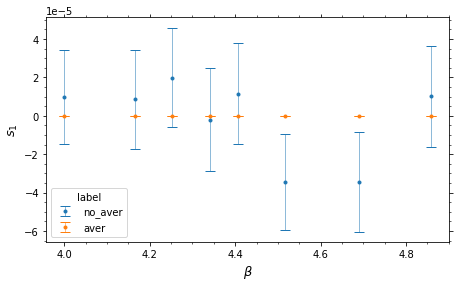

a1


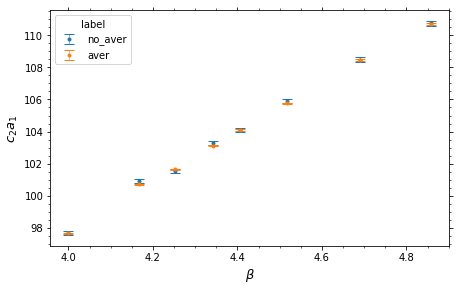

a2


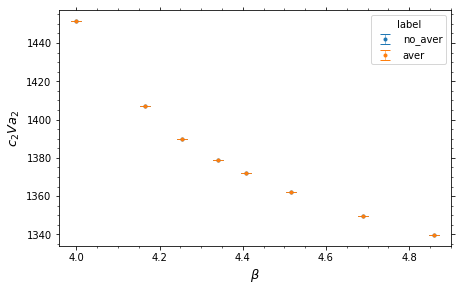

b3


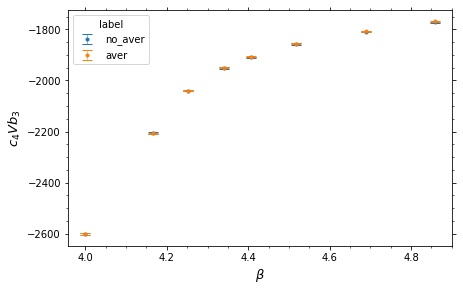

b2


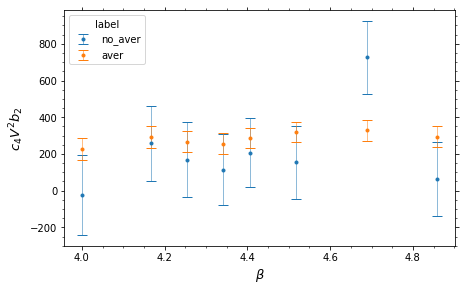

b1


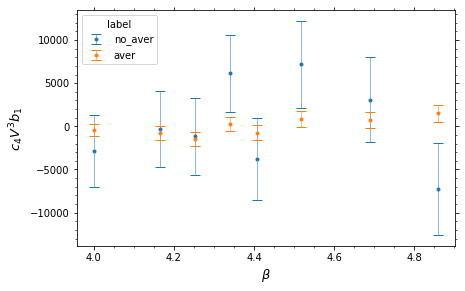

k2


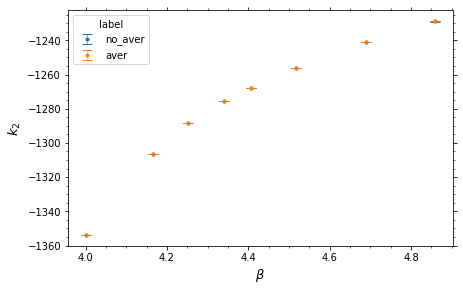

k4


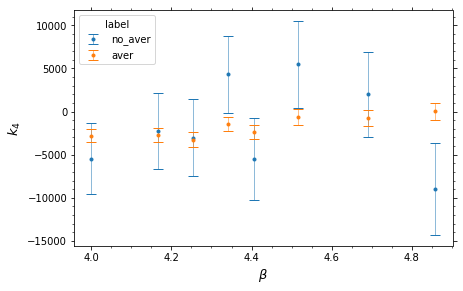

s1


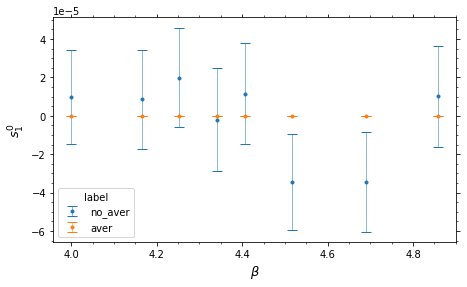

a1


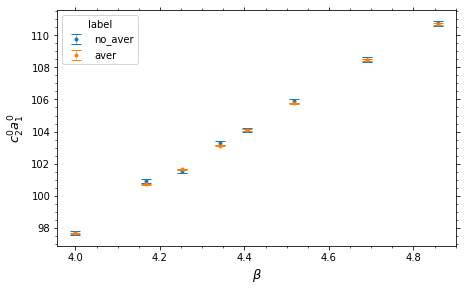

a2


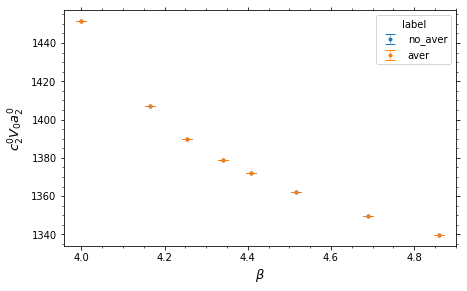

b3


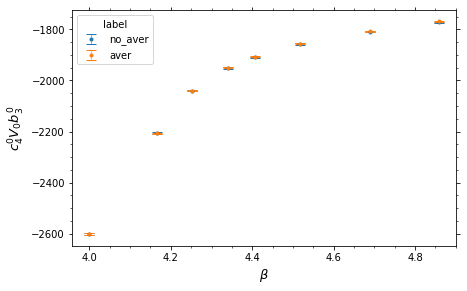

b2


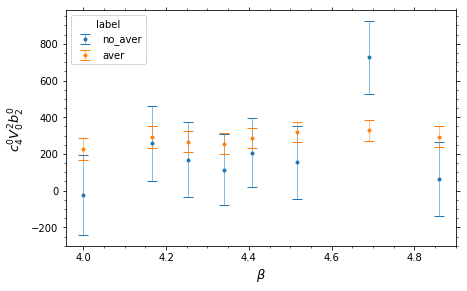

b1


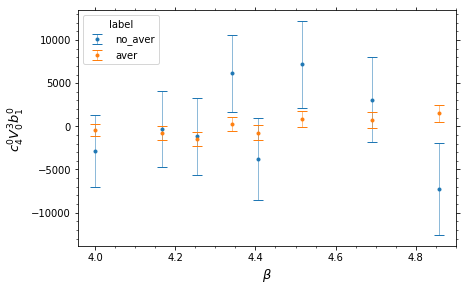

k2


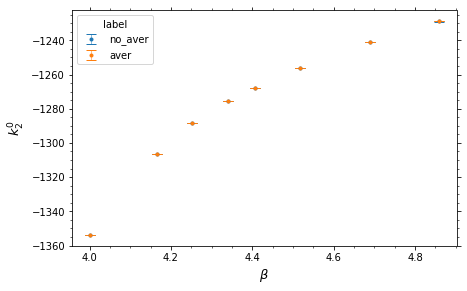

k4


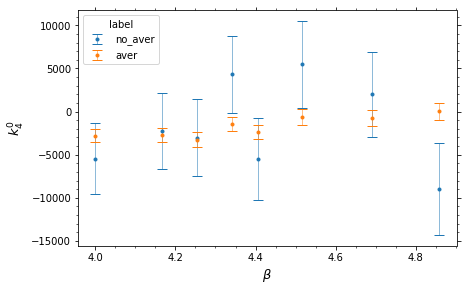

In [25]:
modes = ['common', 'non-zero_temperature', 'zero_temperature']
Nt_T = 5
Nt_0 = 20
Ns = 25
Nz = 20
lattice = f'{Nt_T}x{Nz}x{Ns}^2'

make_plots_coef_together(Nt_T, lattice, modes, 'new')

s1


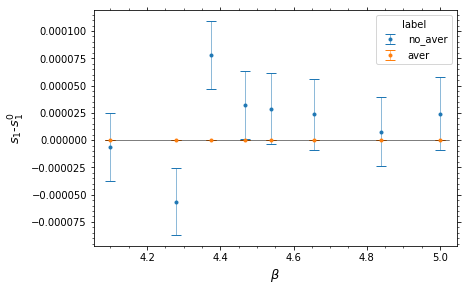

a1


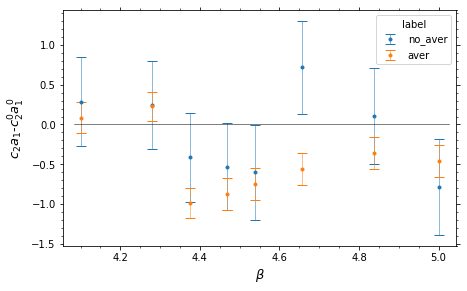

a2


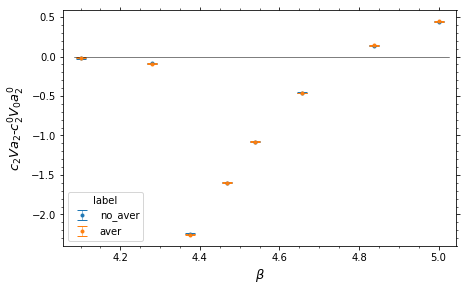

b3


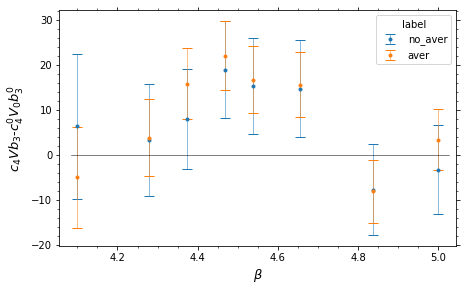

b2


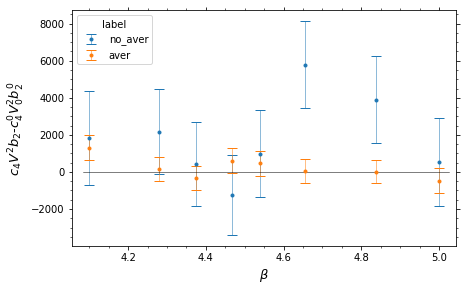

b1


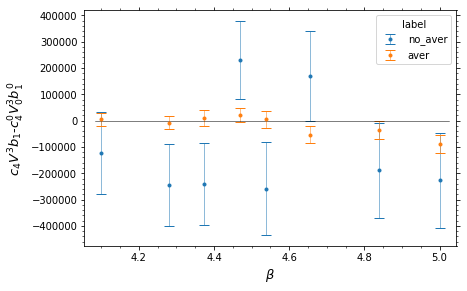

k2


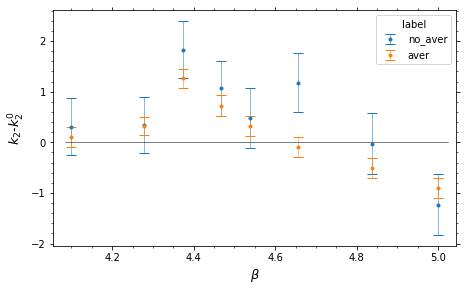

k4


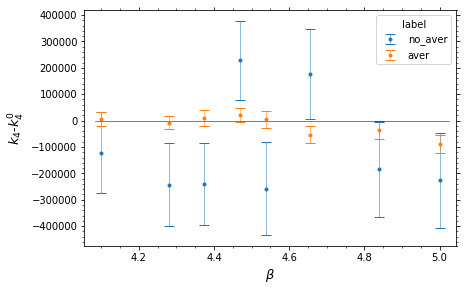

s1


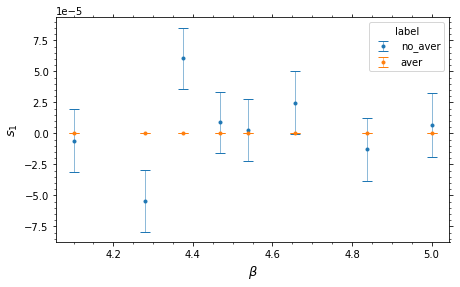

a1


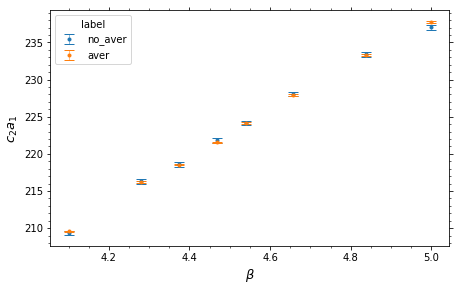

a2


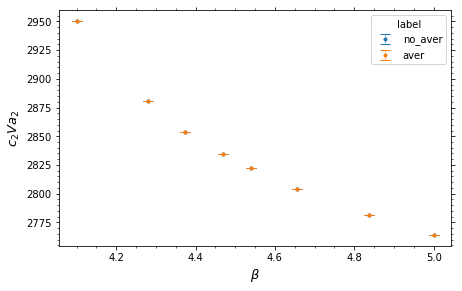

b3


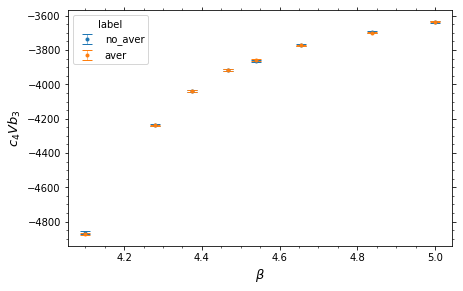

b2


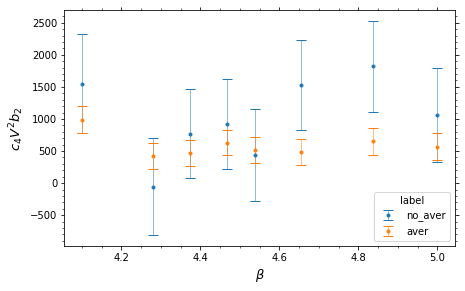

b1


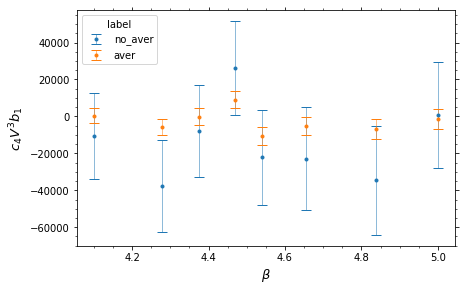

k2


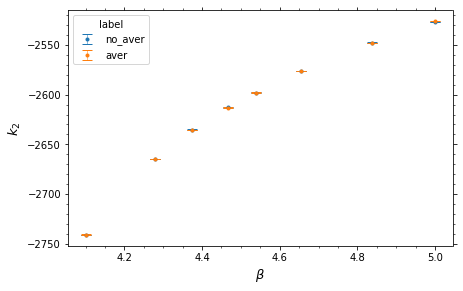

k4


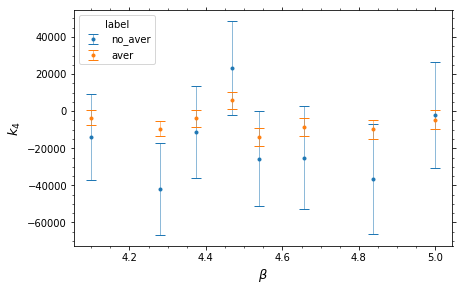

s1


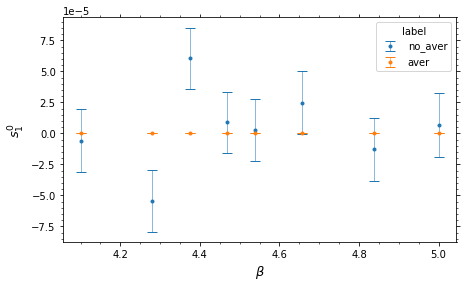

a1


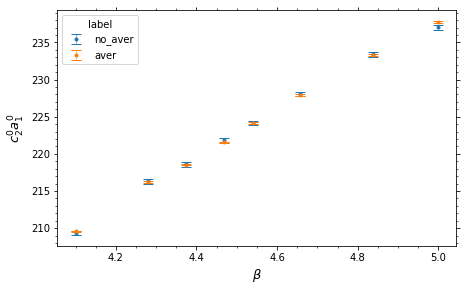

a2


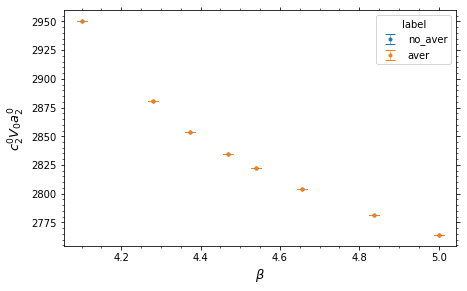

b3


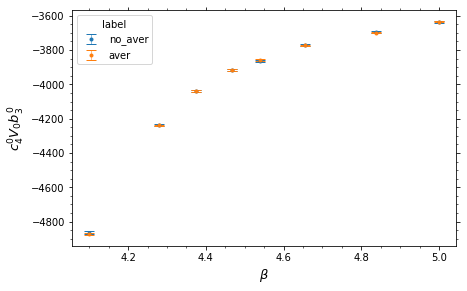

b2


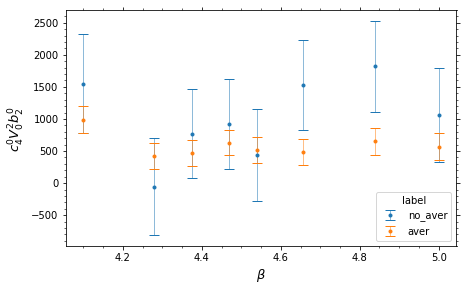

b1


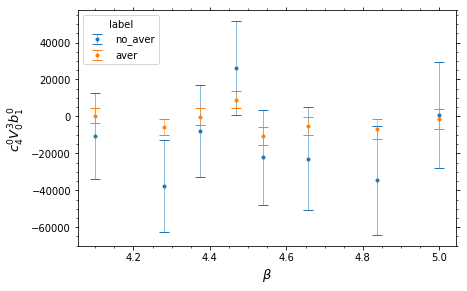

k2


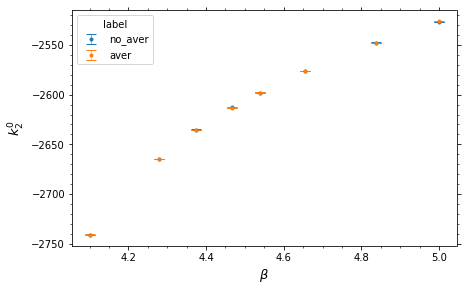

k4


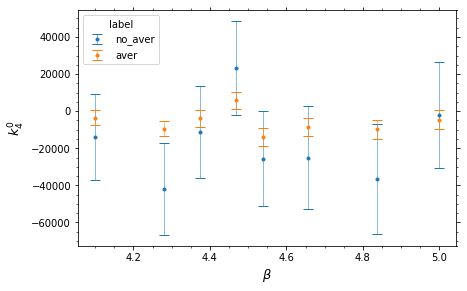

In [26]:
modes = ['common', 'non-zero_temperature', 'zero_temperature']
Nt_T = 6
Nt_0 = 24
Ns = 31
Nz = 24
lattice = f'{Nt_T}x{Nz}x{Ns}^2'

make_plots_coef_together(Nt_T, lattice, modes, 'old')